In [ ]:
from models.temporal_medical import DKF
#Load model to sample from
MFILE = '../../expt-medical/chkpt_filtered3months_indicators/DKF_lr-8_0000e-04-vm-lstm-inf-mean_field-dh-200-ds-20-nl-relu-opt-adam-bs-250-ep-2000-rd-2_0000e-01-rs-300-tl-2-el-2-ttype-mlp-etype-mlp-ar-1_0000e+01-iw-1_0000e-01-uid'
reloadFile = MFILE+'-EP1900-params.npz'
pfile      = MFILE+'-config.pkl'
print 'Reloading trained model from : ',reloadFile
print 'Assuming ',pfile,' corresponds to model'

params= {}
params['seed'] = 1
params['seed'] = 1
dkf  = DKF(params, paramFile = pfile, reloadFile = reloadFile)

In [1]:
%matplotlib inline  
import glob,h5py,os,re
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\usepackage{amsfonts}','\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20
from utils.misc import readPickle
import sys
sys.path.append('../../medical_data/')
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from load import loadMedicalData
dset = 'A'
dataset = loadMedicalData(dset)
from medical import cleanLabels
print dataset.keys()
patient_dict =  cleanLabels(dataset['obs_dict'])
doctor_dict =  cleanLabels(dataset['act_dict'])

evaldict = readPickle('../../expt-medical-fast/check_evaluation.pkl')[0]
print evaldict.keys()

['ind_dict', u'test_obs', u'train_obs', 'data_type', u'valid_ind', 'dim_observations', 'act_dict', u'valid_act', 'obs_dict', u'test_ind', 'dim_indicators', u'train_ind', u'test_act', 'test_mask', 'valid_mask', u'valid_obs', 'train_mask', 'dim_actions', 'mids', u'train_act']
['a_s', 'x_s']


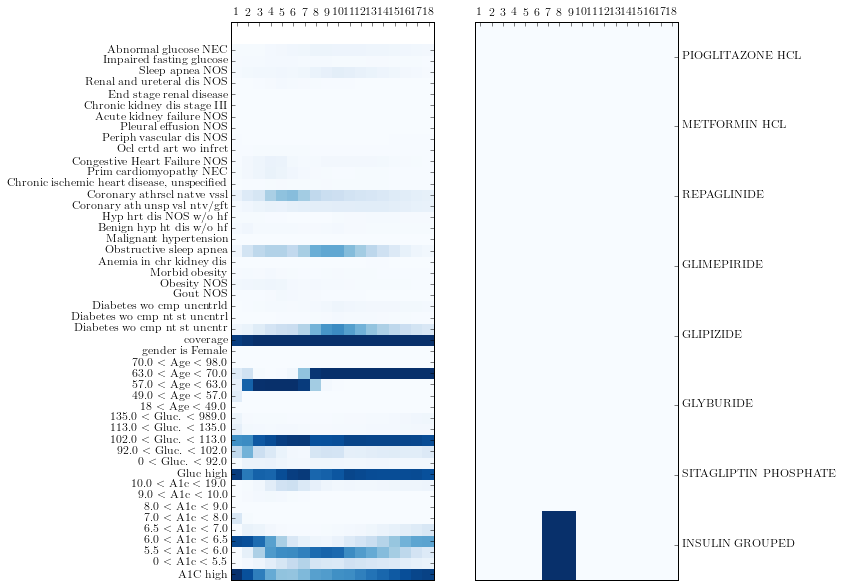

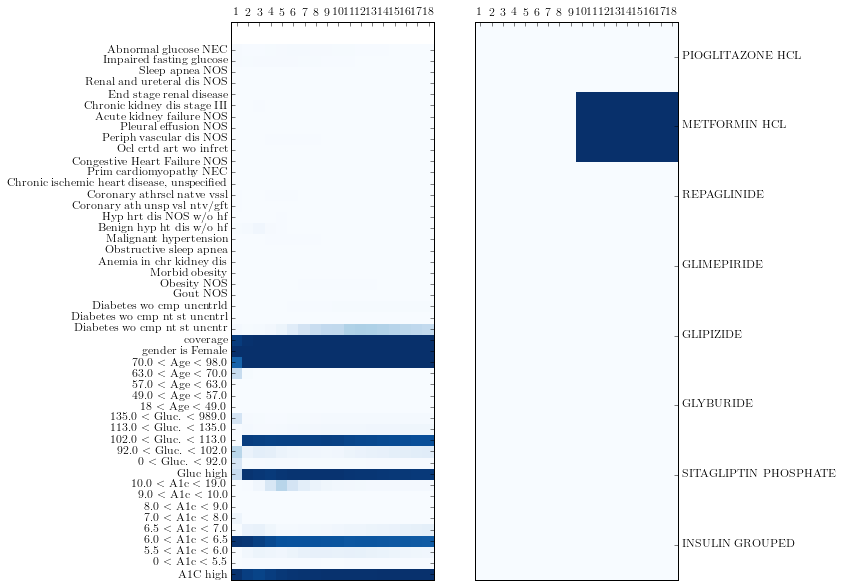

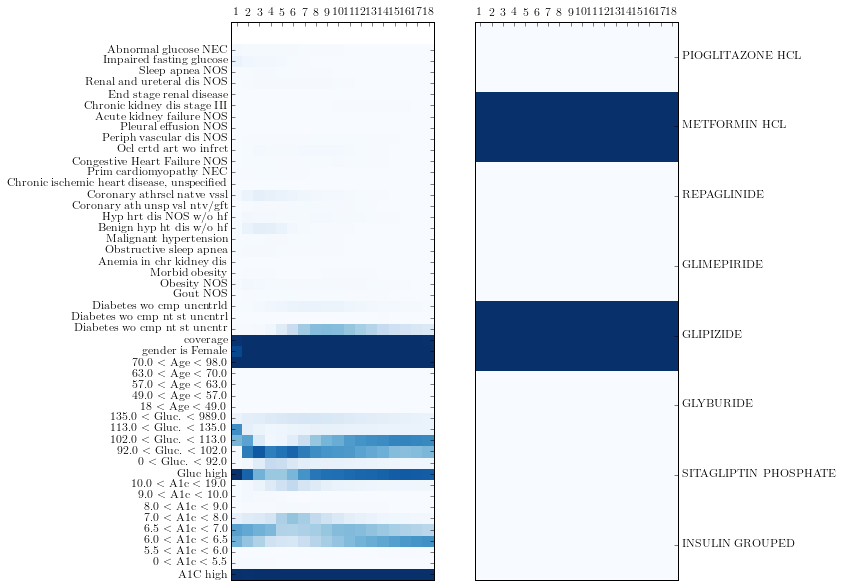

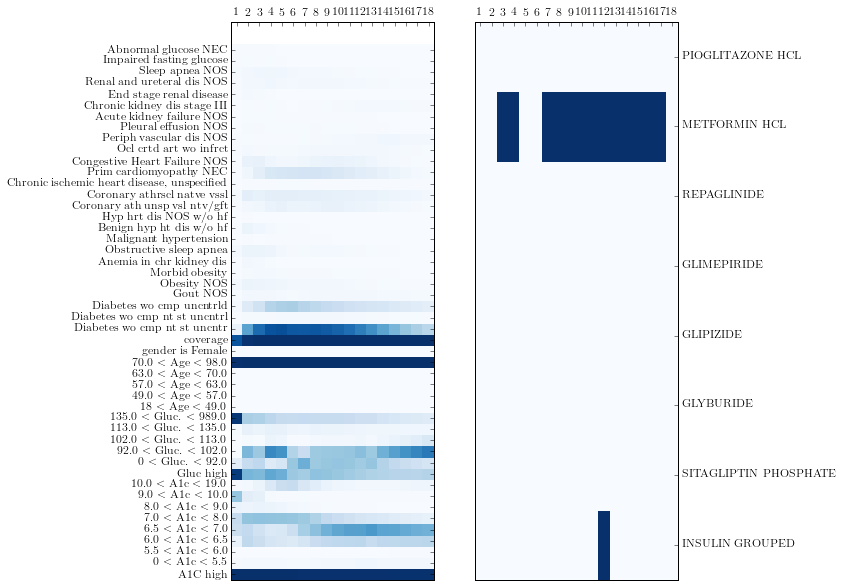

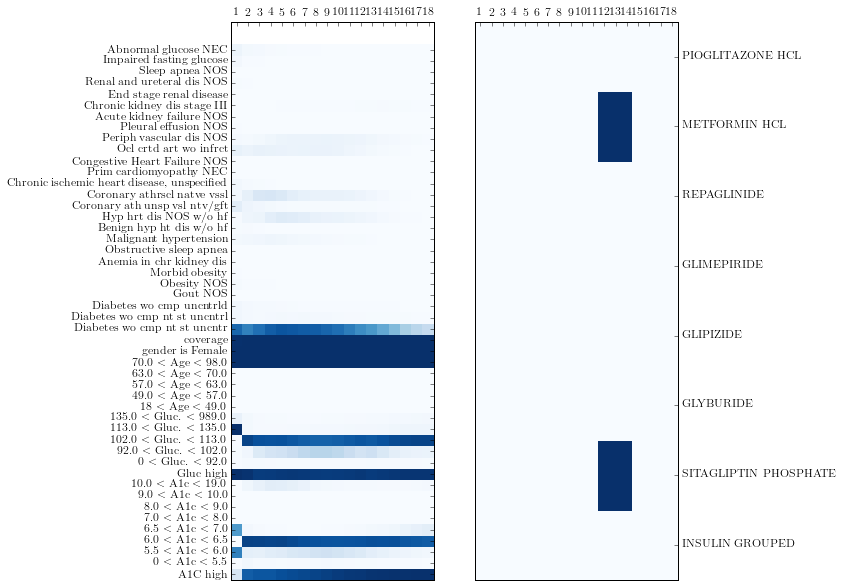

In [4]:
import matplotlib.pyplot as plt
import numpy as np
patient_data   = evaldict['x_s']
doctor_data    = evaldict['a_s']
patdict_data   = patient_dict
docdict_data   = doctor_dict

shufidx = np.random.permutation(patient_data.shape[0])
for ctr in range(5):
    idx = shufidx[ctr]
    row_labels = patdict_data
    data = patient_data[idx,:,:]
    column_labels = range(1,data.shape[0]+1)
    fig, axlist = plt.subplots(1,2,figsize=(8,10))
    #fig.suptitle('Patient: '+mids_data[idx])
    ax = axlist[0]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)

    ax = axlist[1]
    data = doctor_data[idx,:,:]
    column_labels = range(1,data.shape[0]+1)
    row_labels = docdict_data
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    
    plt.show()